In [1]:
import pandas as pd
import numpy as np
data_set=pd.read_csv('train.csv')
data_set

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,WALKING_UPSTAIRS
10295,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,WALKING_UPSTAIRS
10296,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,WALKING_UPSTAIRS
10297,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,WALKING_UPSTAIRS


In [2]:
data_set['Activity'].value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

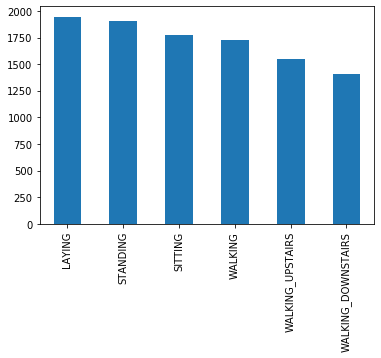

In [21]:
import matplotlib.pyplot as plt
data=pd.DataFrame(data_set['Activity'])
data['Activity'].value_counts().plot.bar()
plt.show()

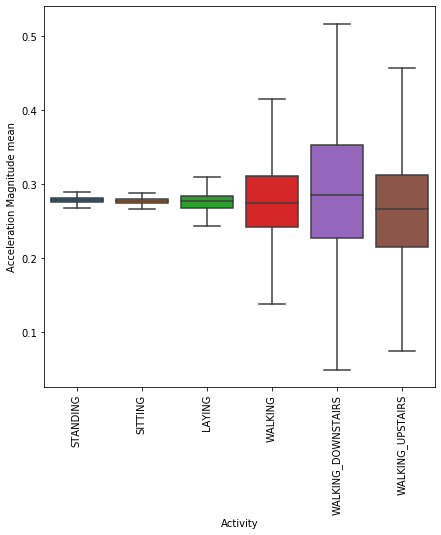

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
sns.boxplot(x='Activity', y='tBodyAcc-mean()-X',data=data_set, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.xticks(rotation=90)
plt.show()

In [5]:
y = data_set['Activity' ]
x = data_set.drop(['Activity'], axis = 1)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)
print("Training data and Testing data are successfuly created")

Training data and Testing data are successfuly created


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
ABC = AdaBoostClassifier(random_state=5)
ABC.fit(X_train, y_train)
y_pred = ABC.predict(X_test)
score=fbeta_score(y_test, y_pred, average='macro', beta=0.5)
accuracy=accuracy_score(y_test, y_pred)
print(score,accuracy)

In [13]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
RFC = RandomForestClassifier(random_state=5)
RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)
accuracy1=accuracy_score(y_test, y_pred)
score1=fbeta_score(y_test, y_pred, average='macro', beta=0.5)
print(score1,accuracy1)

C:\Users\HP\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9638584881777709 0.9640776699029127


In [14]:
#logistic classification
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
LR=LogisticRegression(solver='lbfgs',multi_class='multinomial')
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)
accuracy1=accuracy_score(y_test, y_pred)
score1=fbeta_score(y_test, y_pred, average='macro', beta=0.5)
print(score1,accuracy1)

0.9805505933197819 0.9791262135922331


C:\Users\HP\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [15]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
DT=tree.DecisionTreeClassifier()
DT.fit(X_train,y_train)
y_pred=DT.predict(X_test)
accuracy1=accuracy_score(y_test, y_pred)
score1=fbeta_score(y_test, y_pred, average='macro', beta=0.5)
print(score1,accuracy1)

0.9373137502158642 0.9398058252427185


In [20]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
SVMC=svm.SVC(kernel='linear', C = 1.0)
SVMC.fit(X_train,y_train)
y_pred=SVMC.predict(X_test)
accuracy1=accuracy_score(y_test, y_pred)
score1=fbeta_score(y_test, y_pred, average='macro', beta=0.5)
print(score1,accuracy1)

0.9848279569892474 0.983495145631068


In [22]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
import keras.backend as k
import keras
from keras.models import Sequential
from keras.layers import Dense
classifier=sequential()
classifier.add(Dense(units=64,kernel_initializer='uniform',activation='relu',input_dim=515))
classifier.add(Dropout(0.25))
classifier.add(Dense(units=64,kernel_initializer='uniform',activation='relu'))
classifier.add(Dropout(0.25))
classifier.add(Dense(units=64,kernel_initializer='uniform',activation='relu'))
classifier.add(Dropout(0.25))
classifier.add(Dense(units=64,kernel_initializer='uniform',activation='sigmoid'))
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
classifier.fit(X_train,y_train,batch_size=10,epochs=100)
y_pred=classifier.predict(X_test)
print("learning rate")
print(k.eval(classifier.optimizer.lr))